# 23AIML010 OM CHOKSI PMRP ASSIGNMENT 10 + CLASSWORK 

Part - 1
1. What is the average total energy consumption across all countries?
2. What is the median per capita energy use?
3. What is the correlation between fossil fuel dependency and carbon emissions?
4. Which country has the highest average renewable energy share?
5. What is the standard deviation of the energy price index across different years?
6. How does industrial energy use compare to household energy use on average?
7. Is there a statistically significant difference in per capita energy use between developed and developing countries?
8. What is the distribution of total energy consumption? Is it normally distributed?
9. Can we build a regression model to predict carbon emissions based on energy consumption and fossil fuel dependency?
10. What is the impact of renewable energy share on energy price index?

Part - 2
1. What is the trend of total energy consumption over the years for different countries?
2. Which countries have the highest and lowest fossil fuel dependency?
3. How has the share of renewable energy changed over time?
4. What are the top 5 countries with the highest carbon emissions?
5. What is the distribution of energy price index across different regions?
6. Is there a relationship between energy consumption and Energy Price Index?
7. How does household energy use vary by country?
8. What are the outliers in per capita energy use, and which countries do they belong to?
9. Which year recorded the highest global energy consumption?
10. How do developed vs. developing countries differ in terms of energy consumption and dependency on fossil fuels?

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('global_energy_consumption.csv')
df.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [27]:
df.describe(),df.columns,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


(               Year  Total Energy Consumption (TWh)  \
 count  10000.000000                    10000.000000   
 mean    2012.151400                     5142.564425   
 std        7.155236                     2848.754040   
 min     2000.000000                      100.480000   
 25%     2006.000000                     2713.882500   
 50%     2012.000000                     5190.850000   
 75%     2018.000000                     7579.977500   
 max     2024.000000                     9999.260000   
 
        Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
 count                 10000.000000                10000.000000   
 mean                  25039.950516                   47.322925   
 std                   14205.659284                   24.603767   
 min                     500.270000                    5.000000   
 25%                   12683.220000                   26.110000   
 50%                   25098.770000                   47.150000   
 75%                   37

In [28]:
df.columns

Index(['Country', 'Year', 'Total Energy Consumption (TWh)',
       'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)',
       'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)',
       'Household Energy Use (%)', 'Carbon Emissions (Million Tons)',
       'Energy Price Index (USD/kWh)'],
      dtype='object')

# Part - 1


1. What is the average total energy consumption across all countries?

In [29]:
avg_energy_consumption = df['Total Energy Consumption (TWh)'].mean()
print(f"The average total energy consumption across all countries is: {avg_energy_consumption:.2f} TWh")

The average total energy consumption across all countries is: 5142.56 TWh


2. What is the median per capita energy use?

In [30]:
median_per_capita_energy_use= df['Per Capita Energy Use (kWh)'].median()
print(f"The median per capita energy use across all countries is: {median_per_capita_energy_use:.2f} kWh")

The median per capita energy use across all countries is: 25098.77 kWh


3. What is the correlation between fossil fuel dependency and carbon emissions?

In [31]:
correlation = df['Fossil Fuel Dependency (%)'].corr(df['Carbon Emissions (Million Tons)'])
print(f"The correlation between fossil fuel dependency and carbon emissions is: {correlation:}")

The correlation between fossil fuel dependency and carbon emissions is: 0.0044440061963217795


4. Which country has the highest average renewable energy share?

In [32]:
highest_avg_renewable_country = df.loc[df['Renewable Energy Share (%)'].idxmax(), 'Country']
print(f"The country with the highest average renewable energy share is: {highest_avg_renewable_country}")
highest__renw_eng= df['Renewable Energy Share (%)'].max()
print(highest__renw_eng,"%")

The country with the highest average renewable energy share is: UK
90.0 %


5. What is the standard deviation of the energy price index across different years?

In [33]:
st_dev_eng_price= df['Energy Price Index (USD/kWh)'].std()
print(f"The standard deviation of energy prices is: {st_dev_eng_price:}")

The standard deviation of energy prices is: 0.1307820983151898


6. How does industrial energy use compare to household energy use on average?

The average industrial energy use is: 40.06%
The average household energy use is: 25.04%
The difference between industrial and household energy use is: 15.01%


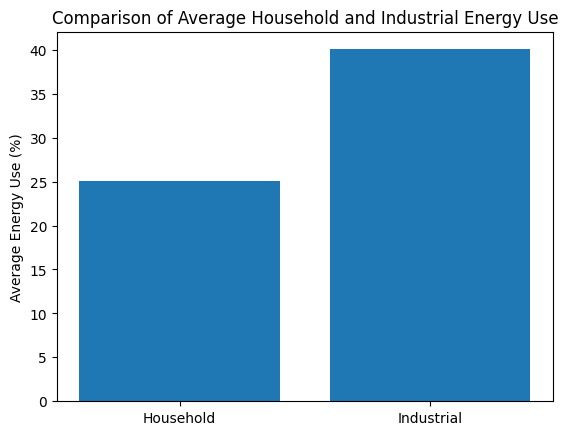

In [34]:
avg_industrial_energy_use = df['Industrial Energy Use (%)'].mean()
avg_household_energy_use = df['Household Energy Use (%)'].mean()
diff=avg_industrial_energy_use-avg_household_energy_use
print(f"The average industrial energy use is: {avg_industrial_energy_use:.2f}%")
print(f"The average household energy use is: {avg_household_energy_use:.2f}%")
print(f"The difference between industrial and household energy use is: {diff:.2f}%")
plt.bar(['Household', 'Industrial'], [avg_household_energy_use, avg_industrial_energy_use])
plt.ylabel('Average Energy Use (%)')
plt.title('Comparison of Average Household and Industrial Energy Use')
plt.show()

7. Is there a statistically significant difference in per capita energy use between developed and developing countries?
 

In [35]:

# Define threshold for developed vs. developing countries
threshold = 15000
df['Category'] = df['Per Capita Energy Use (kWh)'].apply(lambda x: 'Developed' if x >= threshold else 'Developing')

# Separate data into two groups
developed = df[df['Category'] == 'Developed']['Per Capita Energy Use (kWh)']
developing = df[df['Category'] == 'Developing']['Per Capita Energy Use (kWh)']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(developed, developing, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:}")
print(f"P-Value: {p_value:}")
if p_value < 0.05:
    print("There is a statistically significant difference in per capita energy use between developed and developing countries.")
else:
    print("There is no statistically significant difference in per capita energy use between developed and developing countries.")


T-Statistic: 172.33806690593613
P-Value: 0.0
There is a statistically significant difference in per capita energy use between developed and developing countries.


8. What is the distribution of total energy consumption? Is it normally distributed?

Shapiro-Wilk test results:
Statistic: 0.9564
P-value: 2.4433e-47

The distribution is not normally distributed (rejects null hypothesis)

Skewness: -0.043672309991952284
Kurtosis: -1.177846927689829


C:\Users\omcho\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


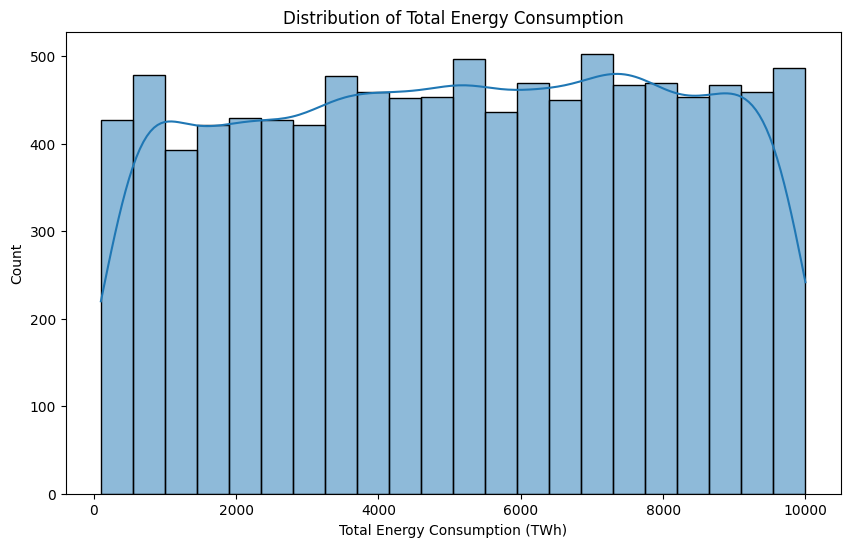

In [36]:
# Create histogram with density plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Energy Consumption (TWh)', kde=True)
plt.title('Distribution of Total Energy Consumption')

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(df['Total Energy Consumption (TWh)'])

print("Shapiro-Wilk test results:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("\nThe distribution is not normally distributed (rejects null hypothesis)")
else:
    print("\nThe distribution appears to be normally distributed (fails to reject null hypothesis)")

# Additional descriptive statistics
print("\nSkewness:", df['Total Energy Consumption (TWh)'].skew())
print("Kurtosis:", df['Total Energy Consumption (TWh)'].kurtosis())
plt.show()

9. Can we build a regression model to predict carbon emissions based on energy consumption and fossil fuel dependency?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


X = df[['Total Energy Consumption (TWh)', 'Fossil Fuel Dependency (%)']]
y = df['Carbon Emissions (Million Tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
model = LinearRegression()
model.fit(X_train, y_train)

 
y_pred = model.predict(X_test)

 
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.2f} Million Tons")
print("\nModel Coefficients:")
print(f"Total Energy Consumption: {model.coef_[0]:.4f}")
print(f"Fossil Fuel Dependency: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Model Performance:
R-squared Score: -0.0012
Root Mean Square Error: 1428.29 Million Tons

Model Coefficients:
Total Energy Consumption: 0.0105
Fossil Fuel Dependency: 0.4056
Intercept: 2462.4084


10. What is the impact of renewable energy share on energy price index?

In [38]:
renw_eng_share= df['Renewable Energy Share (%)']
eng_price_index=df['Energy Price Index (USD/kWh)']
corr=renw_eng_share.corr(eng_price_index)
print(f"The correlation between renewable energy share and energy price index is: {corr:}")

The correlation between renewable energy share and energy price index is: -0.015639918633041795


# PART 2

1. What is the trend of total energy consumption over the years for different countries?

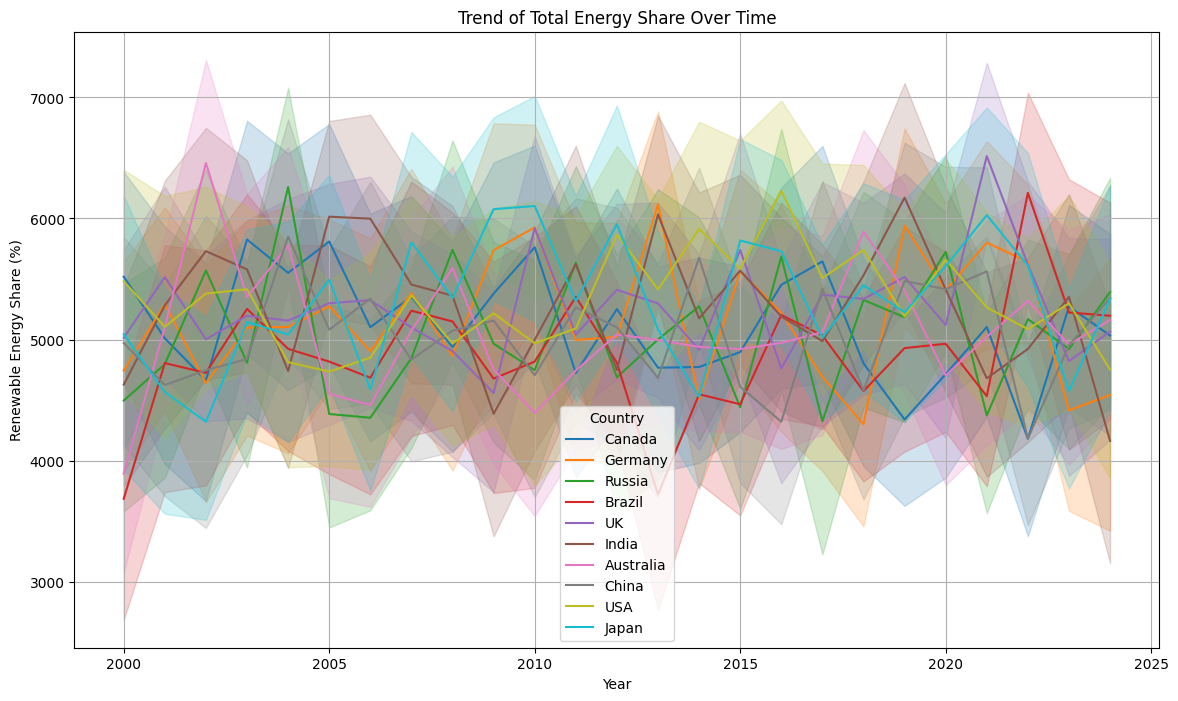

In [39]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Total Energy Consumption (TWh)', hue='Country',markers=True)
plt.title('Trend of Total Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(True)
plt.show()

2. Which countries have the highest and lowest fossil fuel dependency?

In [40]:
highest_fossile_fuel_country = df.loc[df['Fossil Fuel Dependency (%)'].idxmax(), ['Country', 'Fossil Fuel Dependency (%)']]
lowest_fossile_fuel_country = df.loc[df['Fossil Fuel Dependency (%)'].idxmin(), ['Country', 'Fossil Fuel Dependency (%)']]
print(f"The country with the highest fossil fuel dependency is: {highest_fossile_fuel_country['Country']} with {highest_fossile_fuel_country['Fossil Fuel Dependency (%)']}% dependency")
print(f"The country with the lowest fossil fuel dependency is: {lowest_fossile_fuel_country['Country']} with {lowest_fossile_fuel_country['Fossil Fuel Dependency (%)']}% dependency")


The country with the highest fossil fuel dependency is: USA with 80.0% dependency
The country with the lowest fossil fuel dependency is: UK with 10.01% dependency


3. How has the share of renewable energy changed over time?

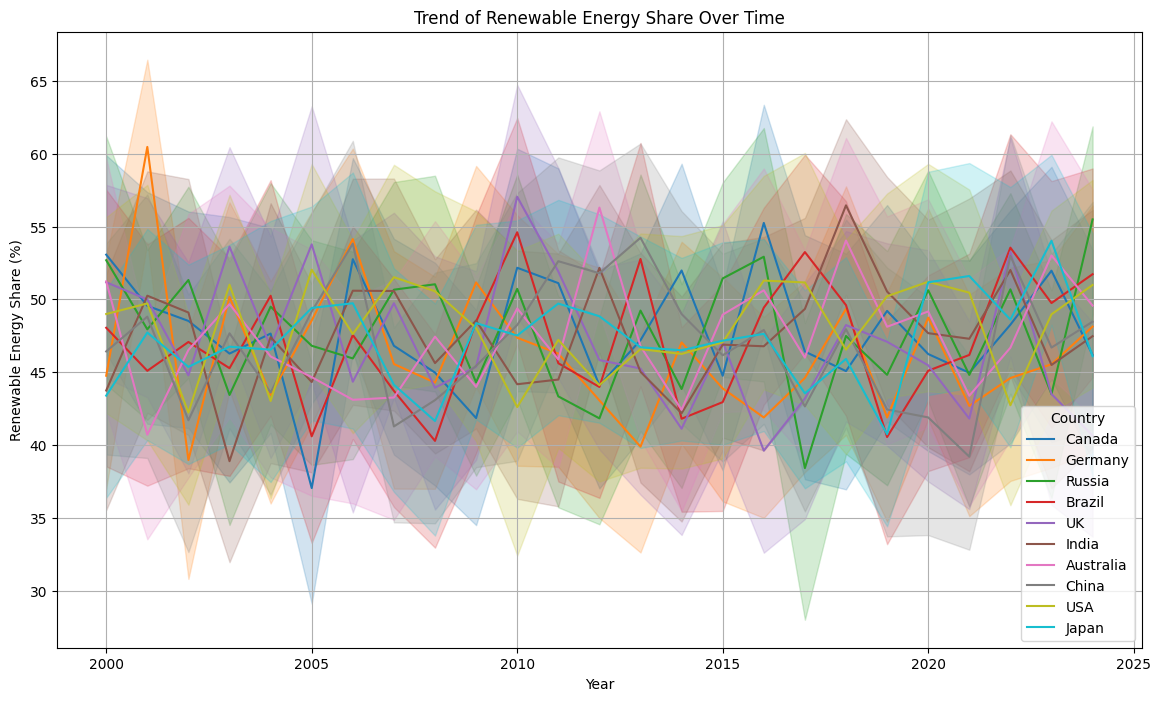

In [41]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Renewable Energy Share (%)', hue='Country',markers=True)
plt.title('Trend of Renewable Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(True)
plt.show()

4. What are the top 5 countries with the highest carbon emissions?

In [42]:
top_5_countries = df.nlargest(5, 'Carbon Emissions (Million Tons)')[['Country', 'Carbon Emissions (Million Tons)']]
print("Top 5 countries with the highest carbon emissions:")
print(top_5_countries)

Top 5 countries with the highest carbon emissions:
        Country  Carbon Emissions (Million Tons)
4173      Japan                          4999.34
8122      India                          4999.30
3796  Australia                          4999.22
695      Canada                          4999.10
1280        USA                          4998.57


5. What is the distribution of energy price index across different regions?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Russia'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'China'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'Japan')])

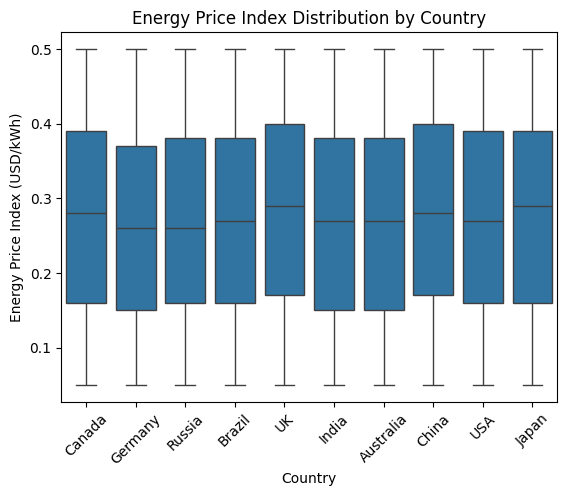

In [43]:
sns.boxplot(data=df, x='Country', y='Energy Price Index (USD/kWh)')
plt.title('Energy Price Index Distribution by Country')
plt.xticks(rotation=45)

6. Is there a relationship between energy consumption and Energy Price Index?

In [44]:
print("Correlation between total energy consumption and energy price index:")
df[['Total Energy Consumption (TWh)', 'Energy Price Index (USD/kWh)']].corr().iloc[0,1]


Correlation between total energy consumption and energy price index:


np.float64(0.005287902005874133)

7. How does household energy use vary by country?

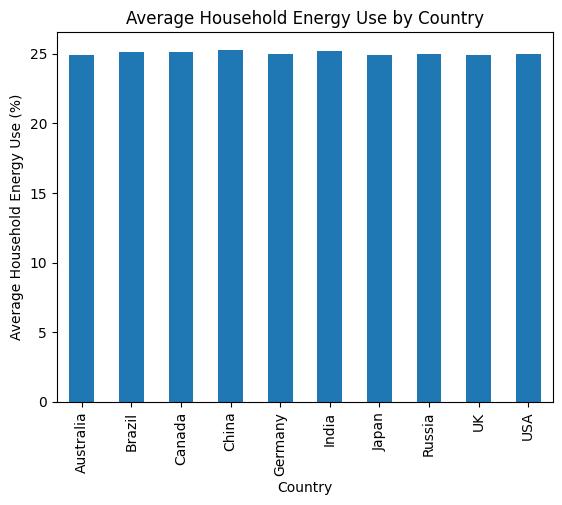

In [45]:
df.groupby('Country')['Household Energy Use (%)'].mean().plot(kind='bar')
plt.title('Average Household Energy Use by Country')
plt.xlabel('Country')
plt.ylabel('Average Household Energy Use (%)')
plt.xticks(rotation=90)
plt.show()

8. What are the outliers in per capita energy use, and which countries do they belong to?


Outlier Information:
Empty DataFrame
Columns: [Country, Year, Per Capita Energy Use (kWh)]
Index: []

Summary of outliers:
Number of outliers: 0
Minimum outlier value: nan kWh
Maximum outlier value: nan kWh


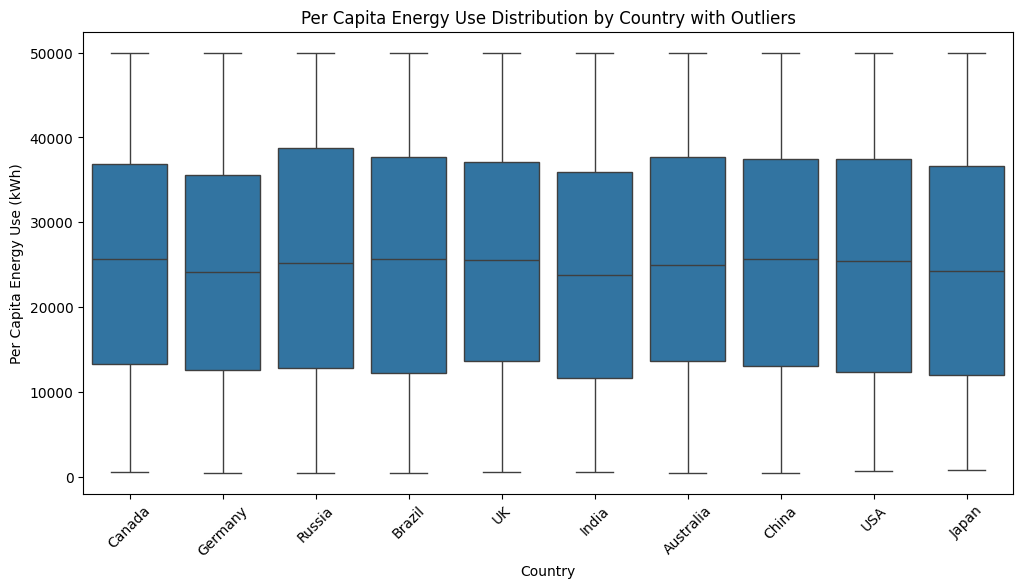

In [47]:
 
Q1 = df['Per Capita Energy Use (kWh)'].quantile(0.25)
Q3 = df['Per Capita Energy Use (kWh)'].quantile(0.75)
IQR = Q3 - Q1
 
outliers = df[
    (df['Per Capita Energy Use (kWh)'] < Q1 - 1.5 * IQR) |
    (df['Per Capita Energy Use (kWh)'] > Q3 + 1.5 * IQR)
]

 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Per Capita Energy Use (kWh)')
plt.xticks(rotation=45)
plt.title('Per Capita Energy Use Distribution by Country with Outliers')

 
print("\nOutlier Information:")
print(outliers[['Country', 'Year', 'Per Capita Energy Use (kWh)']].sort_values('Per Capita Energy Use (kWh)', ascending=False))

 
print("\nSummary of outliers:")
print(f"Number of outliers: {len(outliers)}")
print(f"Minimum outlier value: {outliers['Per Capita Energy Use (kWh)'].min():,.2f} kWh")
print(f"Maximum outlier value: {outliers['Per Capita Energy Use (kWh)'].max():,.2f} kWh")

9. Which year recorded the highest global energy consumption?

In [ ]:
 

highest_global_energy_consumption_year = df['Year'].loc[df['Total Energy Consumption (TWh)'].idxmax()]
print(highest_global_energy_consumption_year)

2019


10. How do developed vs. developing countries differ in terms of energy consumption and dependency on fossil fuels?

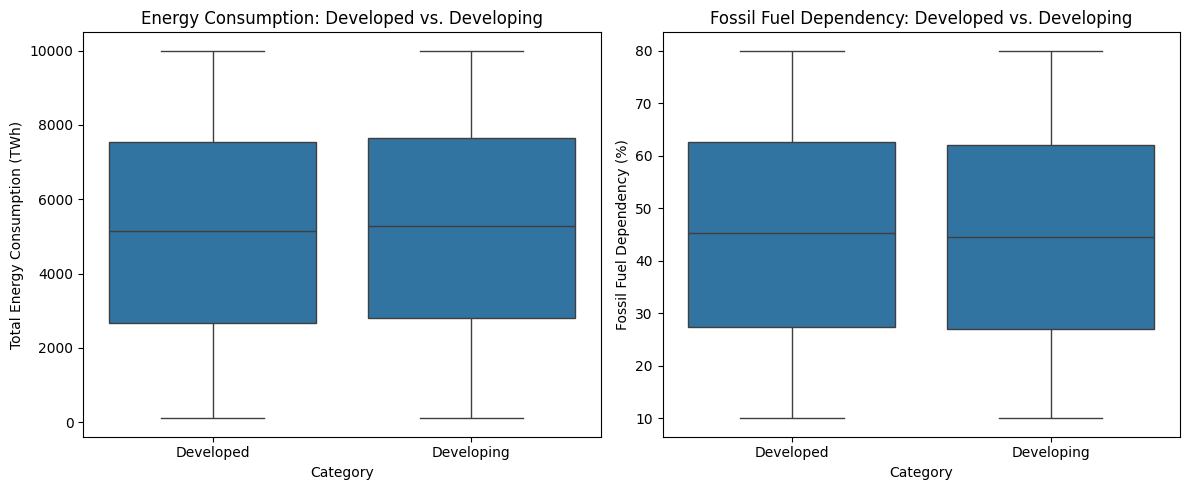

Summary Statistics:
             Total Energy Consumption (TWh)  Fossil Fuel Dependency (%)
Category                                                              
Developed                      5117.666872                   45.103169
Developing                     5201.751820                   44.527964

T-Test Results:
Total Energy Consumption - t-stat: -1.35, p-value: 0.1781
Fossil Fuel Dependency - t-stat: 1.30, p-value: 0.1939


In [ ]:

 
df["Category"] = df["Per Capita Energy Use (kWh)"].apply(lambda x: "Developed" if x >= 15000 else "Developing")

 
summary = df.groupby("Category")[["Total Energy Consumption (TWh)", "Fossil Fuel Dependency (%)"]].mean()
 
t_energy, p_energy = ttest_ind(
    df[df["Category"] == "Developed"]["Total Energy Consumption (TWh)"],
    df[df["Category"] == "Developing"]["Total Energy Consumption (TWh)"],
    equal_var=False
)

t_fossil, p_fossil = ttest_ind(
    df[df["Category"] == "Developed"]["Fossil Fuel Dependency (%)"],
    df[df["Category"] == "Developing"]["Fossil Fuel Dependency (%)"],
    equal_var=False
)
 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x="Category", y="Total Energy Consumption (TWh)", ax=axes[0])
axes[0].set_title("Energy Consumption: Developed vs. Developing")

sns.boxplot(data=df, x="Category", y="Fossil Fuel Dependency (%)", ax=axes[1])
axes[1].set_title("Fossil Fuel Dependency: Developed vs. Developing")

plt.tight_layout()
plt.show()

 
print("Summary Statistics:\n", summary)
print("\nT-Test Results:")
print(f"Total Energy Consumption - t-stat: {t_energy:.2f}, p-value: {p_energy:.4f}")
print(f"Fossil Fuel Dependency - t-stat: {t_fossil:.2f}, p-value: {p_fossil:.4f}")
